# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [1]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

# **Loading the Data**

In [4]:
# GitHub raw URLs
train_url = 'https://raw.githubusercontent.com/ajitbubu/neuralnetwork/main/Train.csv'
test_url = 'https://raw.githubusercontent.com/ajitbubu/neuralnetwork/main/Test.csv'

# Load the datasets
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# Basic info
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

# First few rows
print("\nTrain Data Preview:")
print(train_df.head())

# Class distribution
print("\nTarget Variable Distribution:")
print(train_df['Target'].value_counts(normalize=True).rename("Proportion"))

Train Data Shape: (20000, 41)
Test Data Shape: (5000, 41)

Train Data Preview:
         V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.0686

# **Data Overview**

In [18]:
train_df.head()
#print(train_df.head())

# Feature summary statistics
print("\nTrain set statistics:")
test_df.head()
# print(test_df.head())



Train set statistics:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [20]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [22]:
# Overview of shape
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Check for missing values
print("\nMissing values in train set:", train_df.isnull().sum().sum())
print("Missing values in test set:", test_df.isnull().sum().sum())

# Feature summary statistics
print("\nTrain set statistics:")
print(train_df.describe().T.head(10))  # show summary for first 10 features

# Check feature types
print("\nFeature types:")
print(train_df.dtypes.value_counts())

# Target variable distribution
print("\nTarget variable distribution:")
print(train_df['Target'].value_counts())
print(train_df['Target'].value_counts(normalize=True).rename("Proportion"))

# Preview data
print("\nData sample:")
print(train_df.head())

Train shape: (20000, 41)
Test shape: (5000, 41)

Missing values in train set: 36
Missing values in test set: 11

Train set statistics:
       count      mean       std        min       25%       50%       75%  \
V1   19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2   19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3   20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4   20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5   20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6   20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7   20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8   20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9   20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10  20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   

           max  


# **Exploratory Data Analysis**

## Univariate analysis

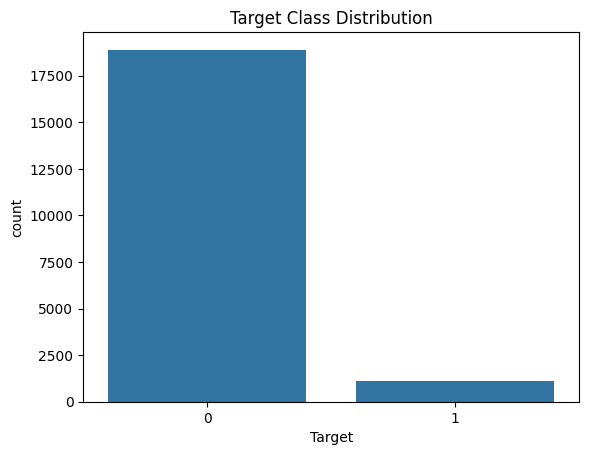

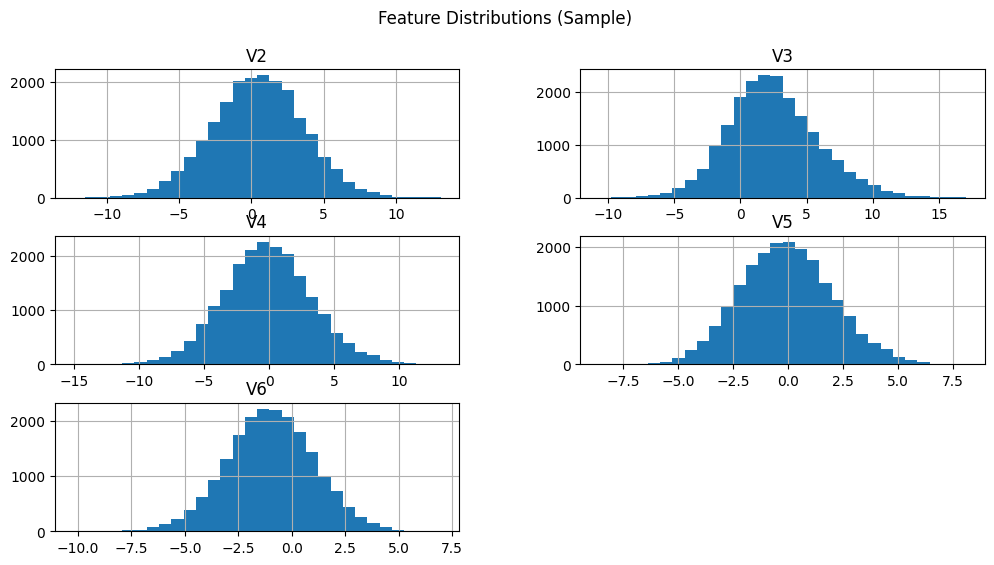

In [25]:
# Target variable count plot
sns.countplot(x='Target', data=train_df)
plt.title("Target Class Distribution")
plt.show()

# Histogram for a few selected features
feature_sample = train_df.columns[1:6]
train_df[feature_sample].hist(figsize=(12, 6), bins=30)
plt.suptitle("Feature Distributions (Sample)")
plt.show()

Insights:

Class 0 (No failure) dominates — class imbalance confirmed.

Most features appear normally distributed or slightly skewed.

## Bivariate Analysis

Focus: Relationship between individual features and the target.

a. Boxplots (Feature vs. Target)

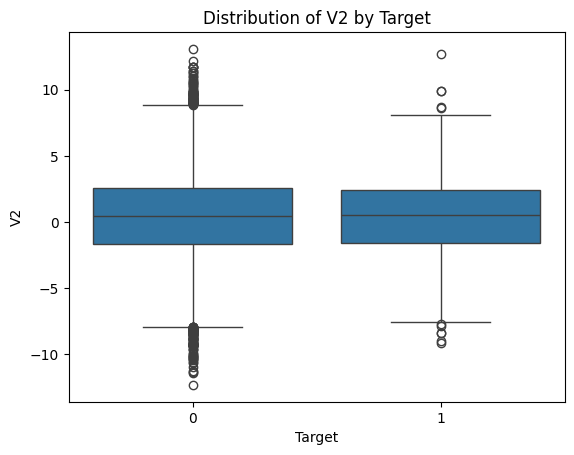

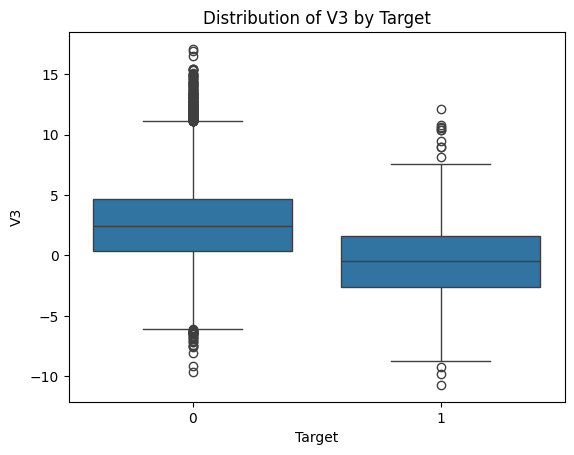

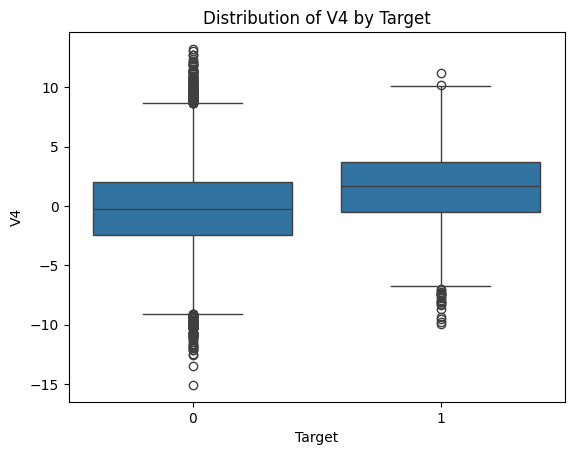

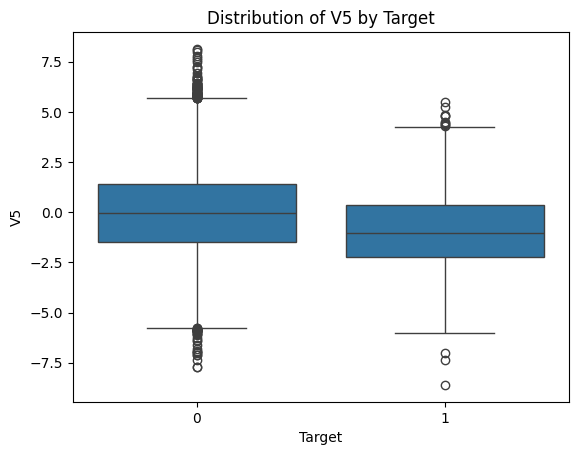

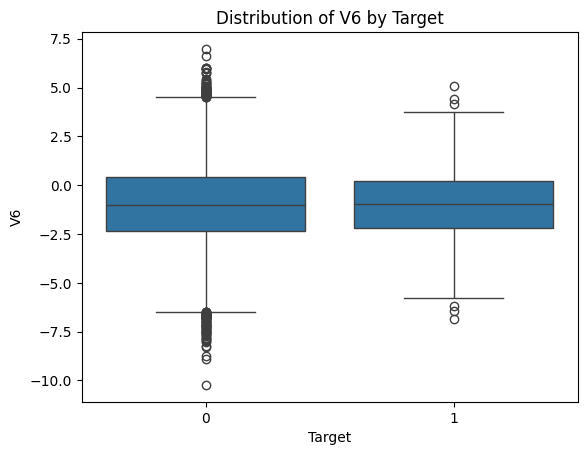

In [26]:
for col in feature_sample:
    sns.boxplot(x='Target', y=col, data=train_df)
    plt.title(f"Distribution of {col} by Target")
    plt.show()


b. Correlation with Target

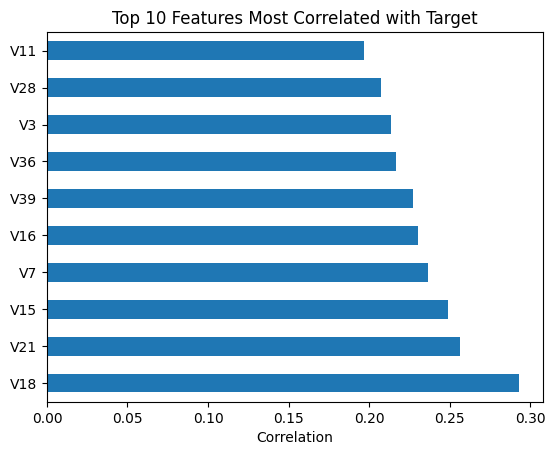

In [28]:
correlations = train_df.corr()['Target'].drop('Target')
top_corr = correlations.abs().sort_values(ascending=False).head(10)

# Barplot
top_corr.plot(kind='barh')
plt.title("Top 10 Features Most Correlated with Target")
plt.xlabel("Correlation")
plt.show()


Insights:

Some features show moderate correlation with the target.

These can guide feature selection or importance estimation.

# **Data Preprocessing**

Missing Values

In [29]:
# Confirm no missing values
print("Train missing values:", train_df.isnull().sum().sum())
print("Test missing values:", test_df.isnull().sum().sum())


Train missing values: 36
Test missing values: 11


Separate Features and Target

In [30]:
X = train_df.drop('Target', axis=1)
y = train_df['Target']


Train-Test Split (For Model Tuning)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# **Model Building**

## Model Evaluation Criterion

Write down the model evaluation criterion with rationale

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

# **Model Performance Improvement**

## Model 1

## Model 2

## Model 3

## Model 4

## Model 5

## Model 6

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

Now, let's check the performance of the final model on the test set.

# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations.